# **Section: Python Packages**

In [1]:
# Importing all of the required python packages
import sys
import os
import pandas as pd
pd.options.display.float_format = '{:,.0f}'.format

In [2]:
# This reloads the extension if already loaded - Everytime you update the .py files, re-run this cell!
%reload_ext autoreload
# Automatically reloads modules before executing code OR makes Jupyter reload your .py files whenever you run a cell.
%autoreload 2

In [13]:
# Setting up the folder paths.
sys.path.append('./lib')

# ---- Import functions within .py files.
# From data_loader.py
from data_loader import load_csv, save_df_to_csv

# From data_wrangle.py
# ---- Section 1: Modular Functions ----
from data_wrangle import add_cols, remove_cols, drop_columns, filter_dataframe, remove_rows, remove_nan_cols, remove_nan_rows, col_name_changer, rename_columns, column_value_changer, remove_leading_wspace, df_split, df_combo, select_columns, df_transpose
# ---- Section 2: Specific Functions for Census Data ----
from data_wrangle import df_formater, df_split_state_city, remove_percent, remove_symbol, census_filter_cols, census_rename_cols, numeric_converter
# ---- Section 3: Specific Functions for Chronic Disease Data----
from data_wrangle import stratify_dataframe, pivot_questions
# ---- Section 4: Specific Functions for Diabetes and Census Metrics ----
from data_wrangle import diabete_metrics_all, diabete_v_overall, diabete_v_educated, diabete_v_commute, diabete_v_income, diabete_v_health_insurance, diabete_v_poverty

# From visual2.py
from visual2 import rename_vis_columns, histogram_boxplot, histogram_boxplot2, histogram_boxplot_grid, create_corrplot, select_columns, create_splom

# **Section: Loading and converting datasets into DataFrames**

In [ ]:
df_indicators_raw = load_csv('./data/raw/U.S._Chronic_Disease_Indicators.csv')

In [ ]:
df_census_raw = load_csv('./data/raw/US_Census_Data_2022_v04_transpose.csv')
print(df_census_raw.shape)

In [ ]:
df_chronic_raw = load_csv('./data/processed/Chronic_Disease_Final.csv')

# **Section: Data Wrangling**

Census DataFrame: df_census
1. Adding the 'State' column to the dataframe.
2. Adding the correct state name to the newly created State column.
3. Removing blank columns.
4. Removing blank rows.
5. Split DataFrame into 2 separate DataFrames, 1 with state and 1 with city, state; City, State Dataset no long need.
6. Split state DataFrame into 2 separate Dataset on State for  Estimate and Margin of Error.
7. Take only the estimate data base.
8. filter down by the only needed columns.
9. convert all values into numeric data type.
10. Combine Census and Chronic Diease dataset on State.
11. Save both DataFrames into csv files in /data/processed folder.

In [ ]:
col_names = ['State']
df_census_temp0 = add_cols(df_census_raw, col_names)
# display(df_census_temp0)    # For debugging only - comment out when not needed.
print(df_census_temp0.shape)

In [ ]:
df_census_temp1 = df_formater(df_census_temp0)
# display(df_census_temp1)    # For debugging only - comment out when not needed.
print(df_census_temp1.shape)

In [ ]:
df_census_temp2 = remove_nan_cols(df_census_temp1)
# display(df_census_temp2)    # For debugging only - comment out when not needed.
print(df_census_temp2.shape)

In [ ]:
df_census_temp3 = remove_nan_rows(df_census_temp2)
# display(df_census_temp3)    # For debugging only - comment out when not needed.
print(df_census_temp3.shape)

In [ ]:
df_state_only, df_city_state = df_split_state_city(df_census_temp3, 'State')
# display(df_state_only)    # For debugging only - comment out when not needed.
# display(df_state_city)    # For debugging only - comment out when not needed.

In [ ]:
# Remove State/location we do not care for.
state_remove = ['Guam', 'District of Columbia', 'Puerto Rico', 'United States', 'Virgin Islands']
df_state_only_updated = remove_rows(df_state_only, 'State', state_remove)
display(df_state_only_updated.head())

In [ ]:
# Filter out only columns we care about.
df_state_only_cols = census_filter_cols(df_state_only_updated)
display(df_state_only_cols.head())
# print(df_state_only_cols.columns)

In [ ]:
# Updating the column labels to a more friendly version.
df_state_only_final = census_rename_cols(df_state_only_cols)
display(df_state_only_final.head())

In [ ]:
# split the dataset into 2 datasets, 1 - estimate value, 1 - moe
df_state_only_estimate, df_state_only_moe = df_split(df_state_only_final, 'Label (Grouping)', 'Estimate', 'Margin of Error')
# display(df_state_only_estimate)         # For debugging only - comment out when not needed.
# display(df_state_only_moe)              # For debugging only - comment out when not needed.

In [ ]:
df_state_only_estimate_no_percent = remove_percent(df_state_only_estimate)
display(df_state_only_estimate_no_percent.head())

In [ ]:
# combine the 2 datasets into 1 main dataset - double the columns 
df_state_only_estimate_updated = df_state_only_estimate_no_percent.add_prefix('est - ')
# display(df_state_only_estimate_updated)
df_state_only_estimate_updated = df_state_only_estimate_updated.rename(columns={'est - State': 'State'})
df_state_only_estimate_updated = df_state_only_estimate_updated.drop(columns=['est - Label (Grouping)'])
display(df_state_only_estimate_updated.head())

In [ ]:
# Convert all values within the census DataFrame into Numerical value except for the "State" column.
df_census_final = numeric_converter(df_state_only_estimate_updated, 1)
display(df_census_final.head())

Census DataFrame: df_chronic_raw
1. Remove all columns with "ConfidenceLimit" within

In [ ]:
# Drop columns that have limited data or are not important to project.
cols_to_drop_confidence = ['ConfidenceLimit']
df_chronic1 = drop_columns(df_chronic_raw, cols_to_drop_confidence)
display(df_chronic1.head())

cols_to_drop_race = ["White", "Black", "Hispanic", "Hawaiian or Pacific Islander",
                       "American Indian or Alaska Native", "Multiracial", "Asian", "ConfidenceLimit"
                    ]
df_chronic_final = drop_columns(df_chronic1, cols_to_drop_race)
display(df_chronic_final.head())

In [ ]:
# Convert all values within the census DataFrame into Numerical value except for the "State" column.
df_census_final = numeric_converter(df_state_only_estimate_updated, 1)
display(df_census_final)

Census DataFrame: df_chronic_raw
1. Remove all columns with "ConfidenceLimit" within

## Chronic Disease Data Wrangling
Dataset Name: _df_indicators_raw_

1. Filter values in specified columns - year, data type, question, and state
2. Update the values in the 'Question' column to readable names
3. Select the columns of interest
4. Rename the 'State' column for the future join
5. Process each stratification (overall, sex, race/ethnicity)
6. Merge processed dataframes together

In [ ]:
# filter values in raw chronic disease data - year, data type, question, and state
columns_include = ['YearStart','DataValueType','Question']
values_include = [[2022],['Crude Prevalence'],['Diabetes among adults','Obesity among adults','Arthritis among adults',
                                                'Food insecure in the past 12 months among households',
                                                'Chronic obstructive pulmonary disease among adults',
                                                'Lack of health insurance among adults aged 18-64',
                                                'Lack of reliable transportation in the past 12 months among adults',
                                                'Unable to pay mortgage, rent, or utility bills in the past 12 months among adults',
                                                'Current asthma among adults']]
columns_exclude = ['LocationDesc']
values_exclude = [['Guam','District of Columbia','Puerto Rico','United States','Virgin Islands']]

cd_filtered_df = filter_dataframe(df = df_indicators_raw,
                               columns_with_include = columns_include,
                               values_to_include = values_include,
                               columns_with_exclude = columns_exclude,
                               values_to_exclude = values_exclude)

In [ ]:
# update values in the 'Question' column to readable names
cd_rename_mapping_dict = {'Arthritis among adults': 'Arthritis', 
                  'Current asthma among adults': 'Asthma',
                  'Unable to pay mortgage, rent, or utility bills in the past 12 months among adults': 'Bill Payment Instability',
                  'Obesity among adults': 'Obesity',
                  'Diabetes among adults': 'Diabetes',
                  'Lack of reliable transportation in the past 12 months among adults': 'Transportation Instability',
                  'Chronic obstructive pulmonary disease among adults': 'COPD'
                 }

cd_renamed_df = column_value_changer(cd_filtered_df, 'Question', cd_rename_mapping_dict)

In [ ]:
# select columns of interest
cd_column_name_list = ['LocationDesc','Question','DataValueUnit','DataValue',
                    'Stratification1','LowConfidenceLimit','HighConfidenceLimit',
                    'Geolocation']

cd_selected_columns = select_columns(cd_renamed_df, cd_column_name_list)

In [ ]:
# rename state column for later join
cd_state_rename = {'LocationDesc': 'State'}
cd_state_rename_df = rename_columns(cd_selected_columns, cd_state_rename)

In [ ]:
# process each stratification and append to a list 

cd_processed_dfs = []
stratifications = [
    'Overall', 'Male', 'Female',
    'Hispanic', 'White, non-Hispanic', 'Black, non-Hispanic',
    'Hawaiian or Pacific Islander, non-Hispanic',
    'American Indian or Alaska Native, non-Hispanic',
    'Asian, non-Hispanic',
    'Multiracial, non-Hispanic'
]
                   

for strat in stratifications:
    # filter to the specified value
    temp_df = stratify_dataframe(cd_state_rename_df, 'Stratification1', strat)
    # pivot to make each question its own column
    temp_df = pivot_questions(temp_df)
    # add prefixes and update 'State' column
    prefix = f'{strat} - '
    temp_df = temp_df.add_prefix(prefix)
    temp_df = temp_df.rename(columns={f'{prefix}State': 'State'})
    
    cd_processed_dfs.append(temp_df)

# merge all processed chronic disease dataframes together 
chronic_disease_final = cd_processed_dfs[0]
for next_df in cd_processed_dfs[1:]:
    chronic_disease_final = pd.merge(chronic_disease_final, next_df, on='State', how='outer')

In [ ]:
# Drop columns that have limited data or are not important to project.
cols_to_drop_confidence = ['ConfidenceLimit']
df_chronic1 = drop_columns(df_chronic_raw, cols_to_drop_confidence)
display(df_chronic1)

cols_to_drop_race = ["White", "Black", "Hispanic", "Hawaiian or Pacific Islander",
                       "American Indian or Alaska Native", "Multiracial", "Asian", "ConfidenceLimit"
                    ]
df_chronic_final = drop_columns(df_chronic1, cols_to_drop_race)
display(df_chronic_final)

In [ ]:
# Combine the chronic disease and census DataFrames.
df_final = df_combo(df_chronic_final, df_census_final, 'State', 'outer')
display(df_final)

In [ ]:
display(df_final.describe())

In [ ]:
save_df_to_csv(df_final, './data/processed/Final_dataset.csv')

Grabbing all Diabetes vs census metrics

In [ ]:
# Final visualization dataset based on the Census Categories vs Diabetes.
# print(df_final.columns)
diabete_met_all = diabete_metrics_all(df_final)
# display(diabete_met_all)

Doing all of the different 6 metrics

In [ ]:
# Diabetes vs overall
diabete_vs_overall = diabete_v_overall(diabete_met_all)
display(diabete_vs_overall.head())


In [ ]:
# Diabetes vs edducated - HS or greater
diabete_vs_educated = diabete_v_educated(diabete_met_all)
display(diabete_vs_educated.head())


In [ ]:
# Diabetes vs Transit
diabete_vs_commute = diabete_v_commute(diabete_met_all)
display(diabete_vs_commute.head())


In [ ]:
# Diabetes vs Income
diabete_vs_income = diabete_v_income(diabete_met_all)
display(diabete_vs_income.head())


In [ ]:
# Diabetes vs Health
diabete_vs_health_insurance = diabete_v_health_insurance(diabete_met_all)
display(diabete_vs_health_insurance.head())


In [ ]:
# Diabetes vs Porverty
diabete_vs_poverty = diabete_v_poverty(diabete_met_all)
display(diabete_vs_poverty.head())


In [ ]:
save_df_to_csv(diabete_met_all, './data/processed/diabete_met_all.csv')
save_df_to_csv(diabete_vs_overall, './data/processed/diabete_vs_overall.csv')
save_df_to_csv(diabete_vs_educated, './data/processed/diabete_vs_educated.csv')
save_df_to_csv(diabete_vs_commute, './data/processed/diabete_vs_commute.csv')
save_df_to_csv(diabete_vs_income, './data/processed/diabete_vs_income.csv')
save_df_to_csv(diabete_vs_health_insurance, './data/processed/diabete_vs_health_insurance.csv')
save_df_to_csv(diabete_vs_poverty, './data/processed/diabete_vs_poverty.csv')

In [8]:
df = load_csv('./data/processed/Final_dataset.csv')

In [9]:
visual_column_renames = {

        # -------------------------
        # Health - Overall
        # -------------------------
        "Overall - Diabetes-DataValue": "Diabetes Prev (%)",
        "Overall - Obesity-DataValue": "Obesity Prev (%)",
        "Overall - COPD-DataValue": "COPD Prev (%)",
        "Overall - Asthma-DataValue": "Asthma Prev (%)",
        "Overall - Arthritis-DataValue": "Arthritis Prev (%)",

        # -------------------------
        # Health - Male
        # -------------------------
        "Males - Diabetes-DataValue": "Diabetes Prev (%) (Male)",
        "Males - Obesity-DataValue": "Obesity Prev (%) (Male)",
        "Males - COPD-DataValue": "COPD Prev (%) (Male)",
        "Males - Asthma-DataValue": "Asthma Prev (%) (Male)",
        "Males - Arthritis-DataValue": "Arthritis Prev (%) (Male)",

        # -------------------------
        # Health - Female
        # -------------------------
        "Females - Diabetes-DataValue": "Diabetes Prev (%) (Female)",
        "Females - Obesity-DataValue": "Obesity Prev (%) (Female)",
        "Females - COPD-DataValue": "COPD Prev (%) (Female)",
        "Females - Asthma-DataValue": "Asthma Prev (%) (Female)",
        "Females - Arthritis-DataValue": "Arthritis Prev (%) (Female)",

        # -------------------------
        # Socioeconomic
        # -------------------------
        "est - Median Household Income": "Median Household Income",
        "est - Pop 18 and Over Below Poverty - %": "Below Poverty (%)",
        "est - Pop Uninsured - %": "Uninsured (%)",
        "est - Total Pop": "Total Population",
        "est - Total Pop - Male - %": "Total Population (%) (Male)",
        "est - Total Pop - Female - %":"Total Population (%) (Female)"
    }
df = rename_columns(df, visual_column_renames)

# **Section: Visualization**

## Part 1: Distribution of Numeric Variables
Create bloxplots and histograms for each variable in the dataset to view and understand the distribution and outliers. Each of these three sections could be a group of subplots to make it visually easier on the eyes

### Diabetes Distribution
Histogram/boxplot for diabetes only

In [ ]:
histogram_boxplot(df,"Diabetes Prev (%)", kde = True, bins=20)

### Other Chronic Diseases
Subplots of the other chronic diseases' histogram/boxplots

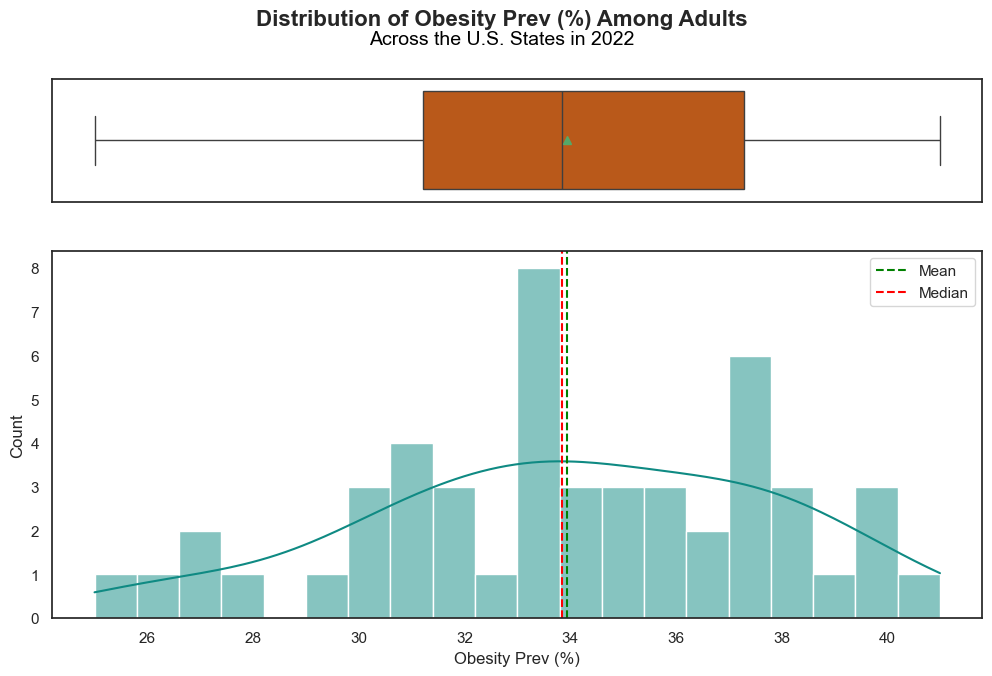

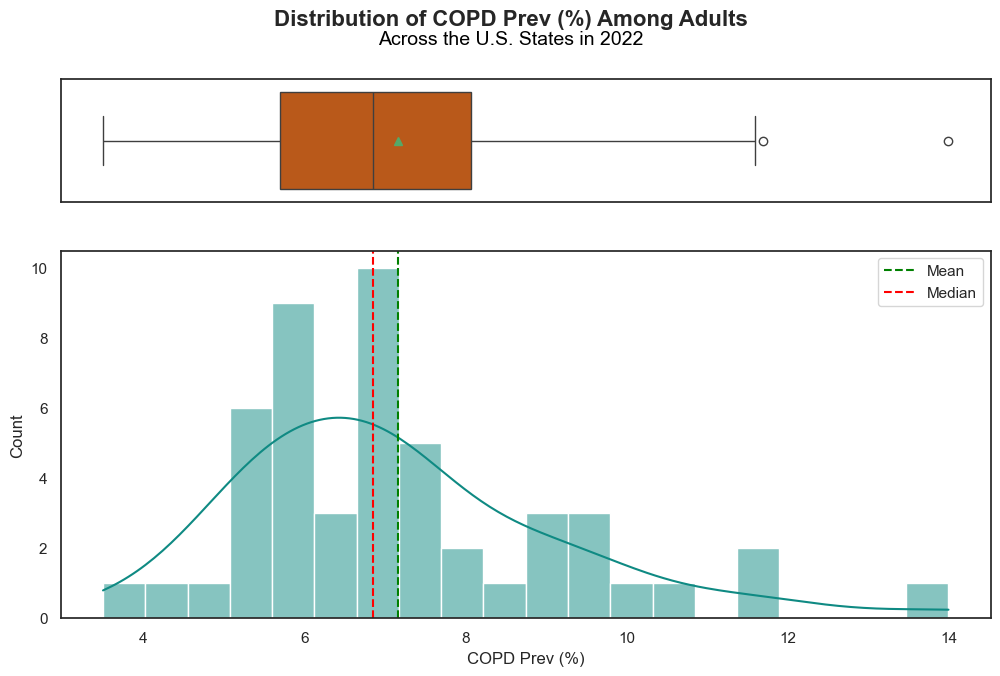

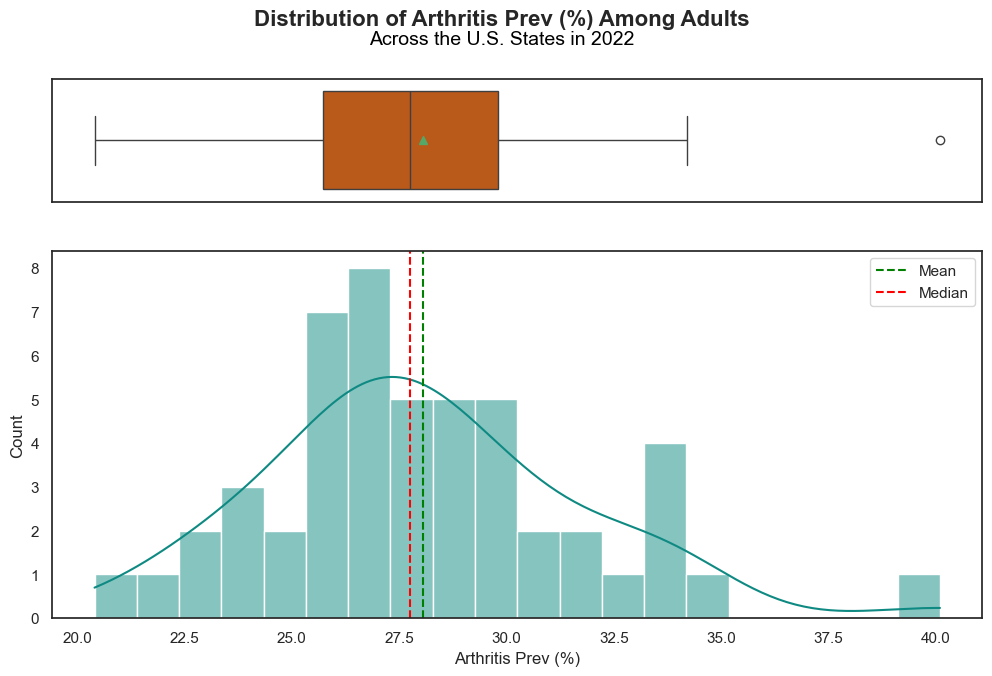

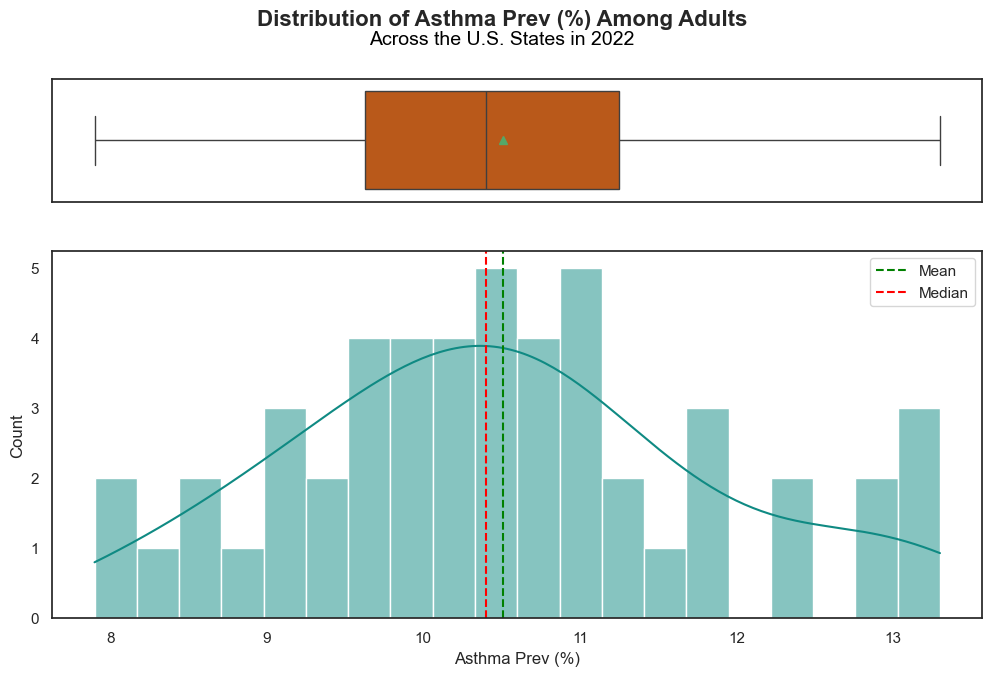

In [21]:
list_of_diseases = ["Obesity Prev (%)","COPD Prev (%)",
                    "Arthritis Prev (%)", "Asthma Prev (%)"]

for feature in list_of_diseases:
    histogram_boxplot(df,feature, kde = True, bins=20)

### Census Metrics
Subplots of the census metrics' histogram/boxplots

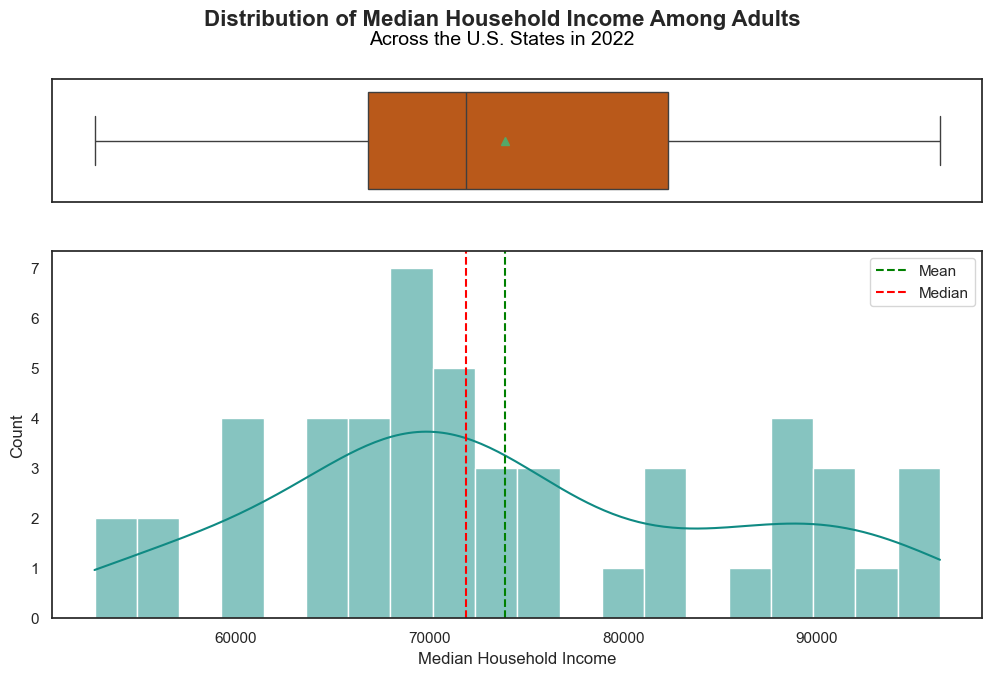

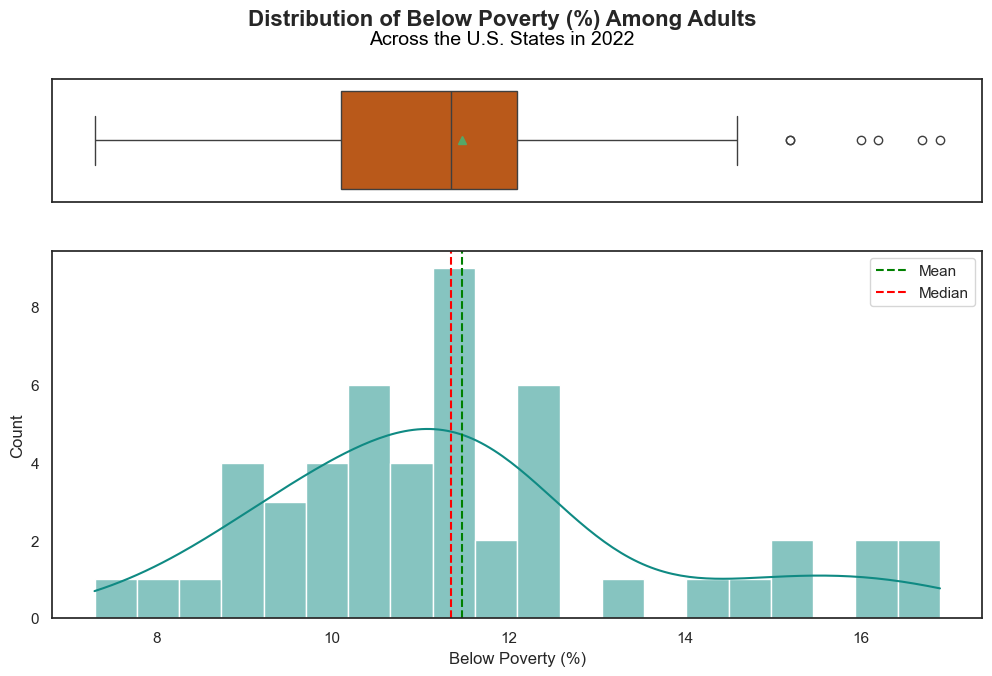

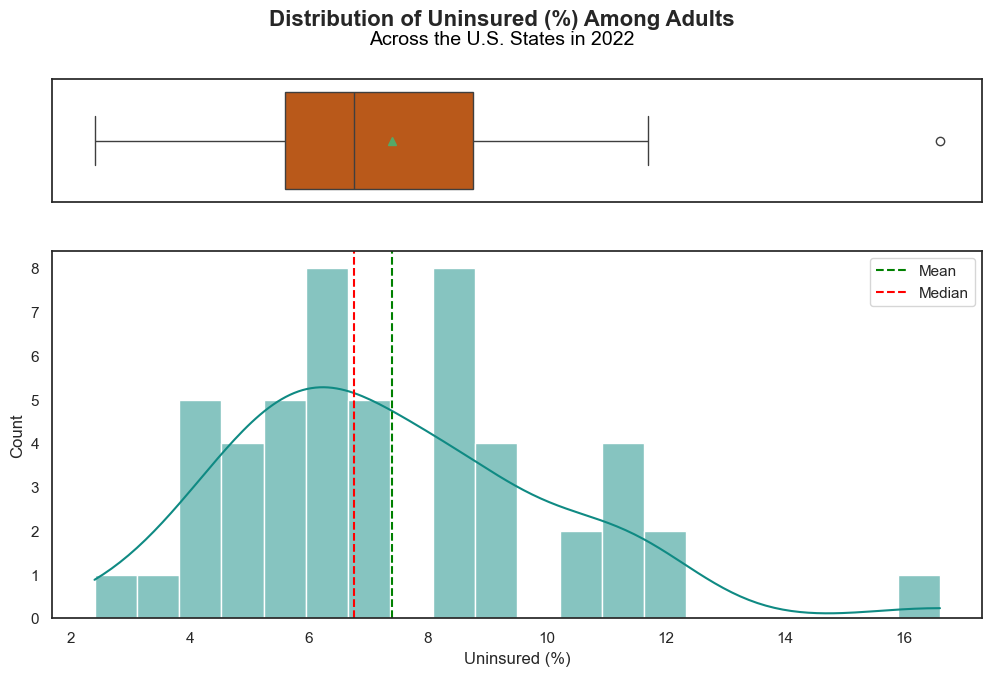

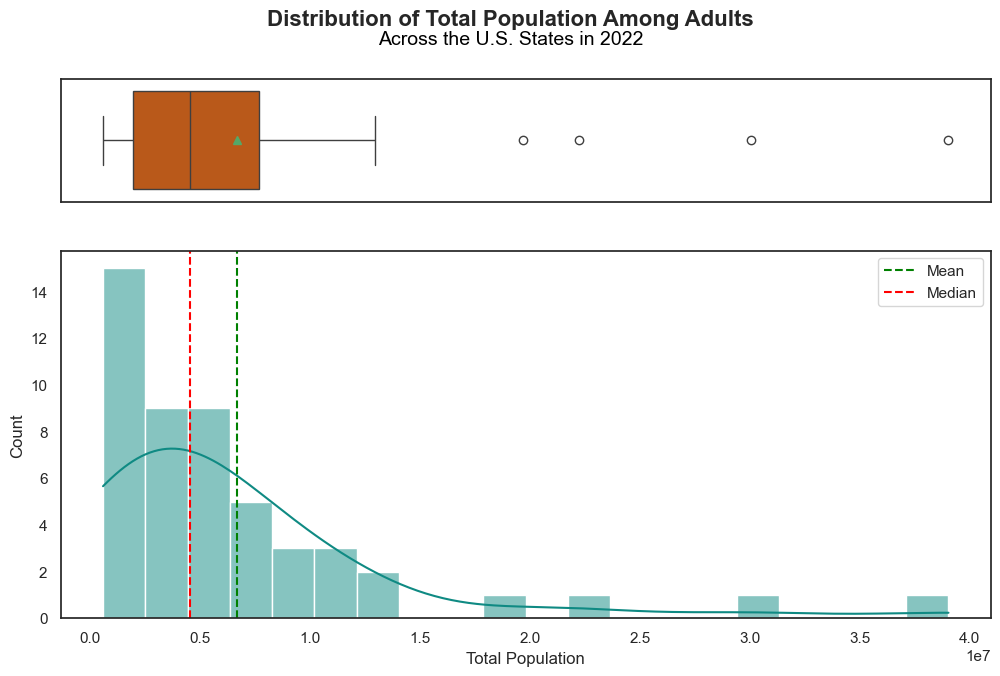

In [22]:
list_of_census = ["Median Household Income","Below Poverty (%)",
                  "Uninsured (%)","Total Population"]

for feature in list_of_census:
    histogram_boxplot(df,feature, kde = True, bins=20)

## Part 2: Correlating Diabetes with Other Chronic Diseases
This is where our heatmap goes. Then we can note that asthma doesn't correlate and we'll stop looking at it now. 

<class 'matplotlib.colors.LinearSegmentedColormap'>


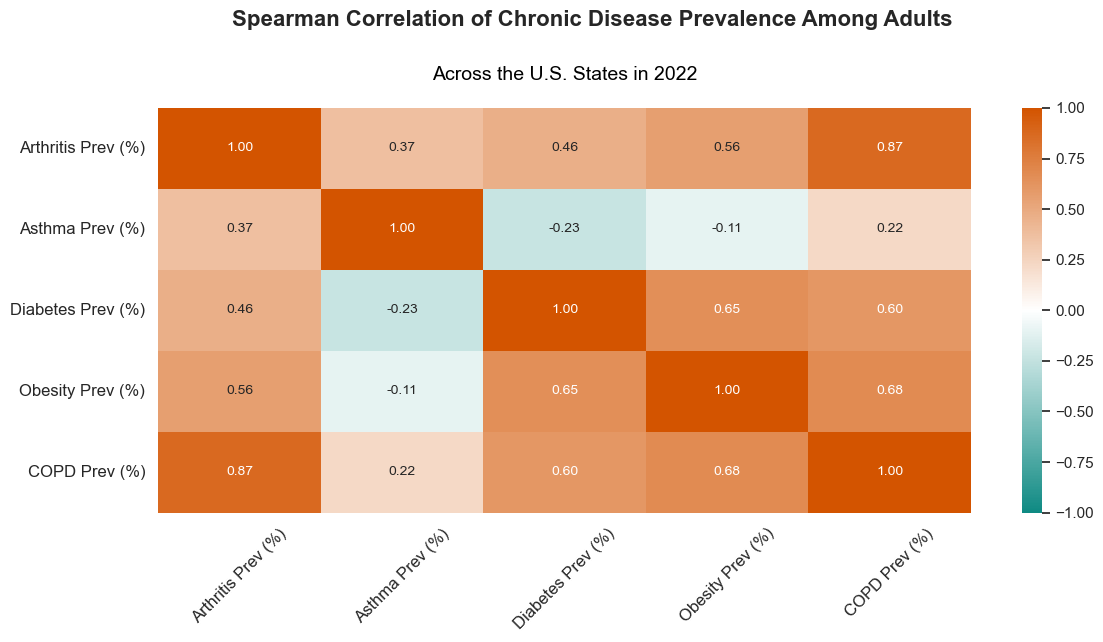

In [23]:
corr_cols = [
    'Arthritis Prev (%)',
    'Asthma Prev (%)',
    'Diabetes Prev (%)',
    'Obesity Prev (%)',
    'COPD Prev (%)'
]

create_corrplot(df, corr_cols, "spearman")

## Part 3: Diabetes vs Metrics
This is where we can make a scatterplot matrix of diabetes vs the chronic diseases
and another scatterplot matrix of diabetes vs the census metrics
From here, we'll decide which look interesting and go to the last, more complex visual

### Diabetes vs Chronic Diseases
insert SPLOM #1 :)

In [ ]:
column_list = ["Diabetes Prev (%)", "Obesity Prev (%)", "COPD Prev (%)", "Arthritis Prev (%)"]

create_splom(df, column_list)

### Diabetes vs Census Metrics
insert SPLOM #2 :)

In [ ]:
list_of_census = ["Median Household Income","Below Poverty (%)",
                  "Uninsured (%)","Total Population"]
create_splom(df, list_of_census)

## Part 4: Adding Dimensions 
Now we can make a bubble plots, scatter plots with weighted regression lines, the composite index, scatter plots with multiple lines/colors, etc. 
We could also look into splitting some by male and female. Seems to be low-hanging fruit after further understanding the data structure!

### Bubbleplots
We see that diabetes correlates most with obesity. Let's run with that. 
* x axis = Obesity rate
* y axis = diabetes rate
* color gradient = diabetes rate
* circle size = total population, percent below poverty line, median income

### Weighted regression line
* x axis = obesity, copd, or arthritis
* y axis = diabetes
* regression line weighted by total population, percent below poverty line, median income

### Composite Index
Could just do "chronic disease burden by state" here! 

### Overlayed Scatterplots
Add a dimension by putting some of the census metrics into their own categories
* x axis = diabetes
* y axis = percent of working people
* line color = drive to work, walk to work, public transportation, other

another option...
* x axis = diabetes
* y axis = percent of working people
line color = employed, unemployed

a third option...
* x axis = diabetes
* y axis = percent of non-institutionalized population
* line color = private health insurance, public health insurance, uninsured

### Males vs Females
We have all of the chronic diseases and the population split by this 